# TOP 5 BOOKS RECOMMENDATION SYSTEM


<img src="Images/books.jpg" alt="Books" width="700" height = "300"/>

| | GROUP MEMBERS | GITHUB | 
| --- | --- | --- |
| 1. | MAUREEN WAMBUGU | https://github.com/Mau-Wambugu |
| 2. | STEPHEN WAWERU | https://github.com/stendewa|
| 3. | LYDIA NJERI | https://github.com/lydiahsherry23 |
| 4. | LILIAN MULI | https://github.com/mwikali24 |
| 5. | PETER MAINA | https://github.com/Mr-PeterMaina |

## 1. BUSINESS UNDERSTANDING

> PROJECT OVERVIEW
* **Recommendation systems** are powerful tools that use machine learning algorithms to provide relevant suggestions to users based on behaviour patterns or user data.  
* **A Book Recommendation System** is a recommendation system where we recommend similar books to readers based on their interests.
* Recommendation systems help drive engagement, increase sales, increases revenue and this in return brings in loyal clients as the customer experience is elevated promoting customer satisfaction.
* We have 2 main recommendation system models:  
    * 1. Collaborative filtering 
    * 2. Content-based Filtering
> BUSINESS PROBLEM  
* Over the past years, there has been rise in huge ecommerce and online services leading clients facing difficulty when searching for the right products.
* Clients looking to purchase books also face the same struggle when trying to match the right books with their taste and preferences.
* **The Business Problem** is to develop a recommendation system that recommends books that are tailored to our users preferences inorder to improve customer experience and engagement.
> PROJECT OBJECTIVE
1. To build a book recommendation system that provides personalized suggestions to our users.
2. Improve sales by showcasing books a user is most likely to buy.
3. Offer relevant books to users inorder to improve customer retention.
4. Increase customer engagement

The analysis aims to achieve these objectives by considering the following analysis questions:

1.Which authors consistently receive higher ratings from users?

2.How does the year of publication affect the average ratings of books? Are newer books preferred over older ones?

3.How accurate are the recommendations generated by the collaborative filtering model especially in terms of precision?

4.How does class imbalance in ratings affect the performance of the recommendation model?

> DATA SOURCE   
* We used data obtained from [Kaggle]("https://www.kaggle.com/datasets/somnambwl/bookcrossing-dataset/data") mined by Cai-Nicolas Ziegler
* It contains 3 CSV Files:
    1. Books.csv - contains information about books{ISBN;Title;Author;Year;Publisher}
    2. Ratings.csv - contains book ratings provided by users  that range from 0 to 10. {{User-ID;ISBN;Rating}}
    3. Users.csv - contains information about the users {User-ID;Age}
> STAKEHOLDERS
1. Customers
* As the end user, they expect accurate book suggestions based on personal interests.
2. Marketing team
* They would want to do targeted advertising on specific books and also promote personalized offers.
3. Data scientist
* Interested in ensuring the recommendation system models are accurate and scalable.
4. Book Authors
* They would be interested in knowing how their books are recommended inorder to learn and understand their readers taste and preferences.
5. Executive {CEO}
* They would want to understand how recommendation systems impact revenue and customer retention comparing it to the budget allocated to the project.
> METHODOLOGY
* Our project will focus on the CRISP-DM:  
    1. Business Understanding
    2. Data Understanding
    3. Data Preparation
    4. Modeling
    5. Evaluation
    6. Deployment

## DATA UNDERSTANDING

> The foundation of any machine learning project lies in a thorough understanding of the dataset. For the Book Recommendation System project, the data understanding phase involves the following key steps:

### A. Dataset Overview
Books Dataset: Contains information about the books, such as the ISBN (International Standard Book Number), title, author, year of publication, and publisher.

Users Dataset: Provides demographic information about users, including their user IDs and age.

Ratings Dataset: Includes user-provided ratings for books on a scale from 0 to 10. It connects users to the books they've rated via user IDs and ISBNs.

### B. Data Merging
We merged Ratings.csv and Users.csv on the User-ID column and then further merged the resulting dataframe with Books.csv on the ISBN column. This provides a comprehensive dataset including the ratings, user demographic data (age), and book details.

### C. Key Insights from the Data

**Outliers**
The Age column contains unrealistic values. These outliers will skew model results and should be handled by capping or removing.

**Missing Values**
The Age column has approximately 27% missing data, which poses a significant challenge. For this analysis, we will impute the median to fill these missing values in order to preserve data integrity.
The Book-Author and Publisher columns have negligible missing data, which can be dropped without much impact.
The Image URLs columns will be dropped as they havve no significance in our data analysis.


### D. Data Analysis
To have a better visualization of the data distribution, we conduct an extensive analysis through:

**i) Univariate Analysis**

**Book Ratings**: Visualizing the distribution of ratings helps to identify trends like how many users may tend to give mid-range or higher ratings.
**User Ages**: The age distribution will not only show certain age clusters like young adult readers and middle-aged readers but also reveal outliers.

**ii) Bivariate Analysis**

**User Age vs. Book Ratings**: Investigating how user age affects their book ratings can uncover patterns like how younger users might prefer different genres than older users.

**Book Author vs Average Rating**: This will help to identify which authors tend to get higher ratings.

**Publisher vs. Average Book Rating**:This examines whether certain publishers consistently publish books that receive higher ratings.

**Age vs. Publisher Preference**:This analysis helps to explore if users of certain age groups prefer books from specific publishers.

**User vs. Book Rating**:This helps to understand if certain users tend to give consistently higher while others may be more critical.

**Year of Publication vs. Average Book Rating**:This helps to investigate whether older books or more recent publications tend to receive higher ratings.

### E. Modeling
For this project, we will build and evaluate two types of recommendation systems:
##### 1. Collaborative Filtering
This approach recommends books based on user behavior and preferences of similar users that is user-user collaborative filtering or similar books rated highly by a user that is item-item collaborative filtering. We will implement collaborative filtering using matrix factorization techniques like SVD  and Cosine similarities to compute similar books based on ratings.

**Drawback**: New users or items without sufficient interaction history may not receive accurate recommendations.

### F. Model Evaluation 

#### Collaborative Filtering
For evaluation, we will use Accuracy Test to evaluate using metrics like:

**Precision** to measure how many of the top book recommendations made by the collaborative filtering model are relevant to the user

**Recall** to measure how many relevant books are included in the top  recommendations out of all the relevant books available. This metric ensures users have a wide variety of book recommendations without missing out on any relevant books that similar users have liked.

**F1-score** that ensures the system provides accurate recommendations without excluding too many potential relevant books.

### G. Expected Outcome
For our overall metric our analysis will mostly focus on **precision**. This is because we want to ensure that the recommendations provided are relevant meaning the suggested books is very likely to be relevant to the user. This helps meet the goal of user satisfaction by prioritizing highly relevant items to enhance the user experience.

The overall expectation is to have a recommendation system with a high precision score of **atleast 75%** that ensures the model provides accurate, personalized book suggestions to users based on their ratings and preferences.


## DATA PREPARATION

## i) Loading the Datasets

In [31]:
#Import neccessary  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#Load 'books.csv' dataset
Books = pd.read_csv(r'DATA\Books.csv',low_memory= False)
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [33]:
#Load 'ratings.csv' dataset
Ratings = pd.read_csv(r'DATA\Ratings.csv',low_memory=False)
Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [34]:
#Load 'users.csv' dataset
Users = pd.read_csv(r'DATA\Users.csv',low_memory=False)
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Merging the datasets
From our datasets above, there 3 files share some columns that can be used to merge them into one. The ratings and users dataset share a common column 'User-ID'.

In [35]:
#perform the merge based on 'User-ID'
merged_df = pd.merge(Ratings,Users[['User-ID','Age']],on='User-ID',how='inner')
#keep only the selected columns
merged_df = merged_df[['User-ID','Book-Rating','Age','ISBN']]
merged_df.head()

,User-ID,Book-Rating,Age,ISBN
0,276725,0,NaN,034545104X
1,276726,5,NaN,0155061224
2,276727,0,16.0,0446520802
3,276729,3,16.0,052165615X
4,276729,6,16.0,0521795028


We the merge the third dataset to our merged data using the common column 'ISBN' to create the final combined dataframe.

In [36]:
#perform the merge based on 'ISBN'
merged_df1 = pd.merge(merged_df,Books,on='ISBN',how='inner')
merged_df1.head()

,User-ID,Book-Rating,Age,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,0,NaN,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,5,23.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,0,34.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,5,2.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,9,NaN,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


From the data above we drop the irrelevant url columns as they will not be used for our analysis.

In [37]:
# Drop unnecessary image URL columns
merged_df1 = merged_df1.drop(columns=['Image-URL-L','Image-URL-M','Image-URL-S'],axis=1)
merged_df1.head()

,User-ID,Book-Rating,Age,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,0,NaN,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,5,23.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,0,34.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,5,2.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,9,NaN,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [38]:
#Rename the columns
merged_df1.rename(columns={"User-ID": "UserID",
                   "Book-Rating":"Rating", 
                   "Book-Title": "Book_title", 
                    "Book-Author":"Author",
                   "Year-Of-Publication": "Publication_Year"}, inplace=True)

In [39]:
#Summary of our dataframe
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   UserID            1031136 non-null  int64  
 1   Rating            1031136 non-null  int64  
 2   Age               753301 non-null   float64
 3   ISBN              1031136 non-null  object 
 4   Book_title        1031136 non-null  object 
 5   Author            1031135 non-null  object 
 6   Publication_Year  1031136 non-null  object 
 7   Publisher         1031134 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 70.8+ MB


In [40]:
#Get shape of the dataset
merged_df1.shape

(1031136, 8)

## ii) Exploratory Data Analysis (EDA)

### 1.Univariate Analysis

### a. Distribution of Book Ratings
This helps to understand the general sentiment of users towards the books.

In [41]:
merged_df1['Rating'].value_counts()

0     647294
8      91804
10     71225
7      66402
9      60778
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: Rating, dtype: int64

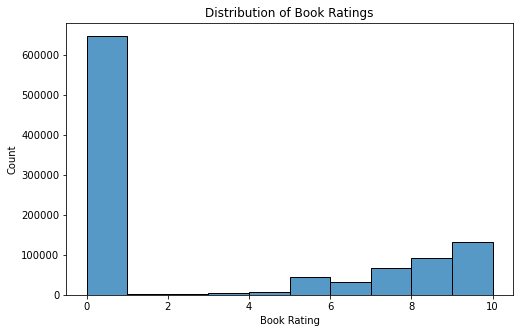

In [42]:
#Plot the graph
plt.figure(figsize=(8, 5))
sns.histplot(merged_df1['Rating'], bins=10, kde=False)

plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()

#### Interpretation
The rating of 0 is extremely frequent, which may indicate that many users haven't rated some books. This category dominates the distribution and may skew the data. In terms of Most Popular Ratings, apart from the large number of 0 ratings, the majority of ratings are concentrated in the higher range ratings of 7, 8, 9, and 10, indicating that users tend to give positive ratings. There's a gradual decline in counts as ratings decrease from 10 to 1. Ratings between 1 and 4 are significantly less frequent, suggesting that users are less likely to give very low ratings.

### b. Distribution of User Age

In [43]:
#Top 20 most frequent user ages
merged_df1['Age'].value_counts().head(20)

33.0    32862
29.0    30646
30.0    27201
32.0    26490
36.0    26096
28.0    25966
31.0    25964
34.0    25893
38.0    22396
27.0    22280
26.0    22107
25.0    21768
44.0    21510
37.0    21116
43.0    20612
35.0    19573
23.0    18793
24.0    18572
47.0    18517
52.0    17637
Name: Age, dtype: int64

In [44]:
#Highest user age
merged_df1['Age'].max()

244.0

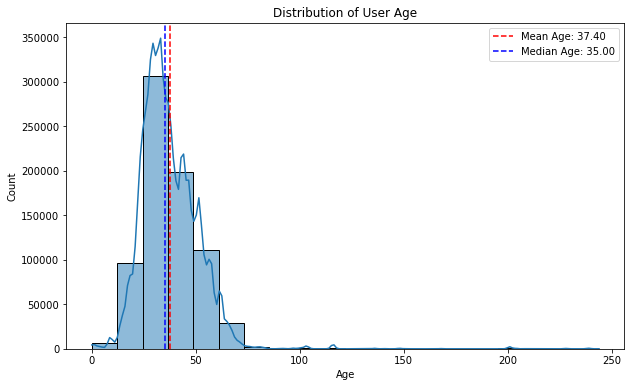

In [45]:
mean_age = merged_df1['Age'].mean()
median_age = merged_df1['Age'].median()

# Plot Distribution of User Age
plt.figure(figsize=(10, 6))
sns.histplot(merged_df1['Age'], bins=20, kde=True)
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean Age: {mean_age:.2f}')
plt.axvline(median_age, color='blue', linestyle='--', label=f'Median Age: {median_age:.2f}')
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.legend()
plt.show()


#### Interpretation
Based on the distribution above, majority of the users in the dataset lie between the age 18 to 60. The mean lies at 37 years while the median lies at 35 years suggesting majority of the users are near that age. The ages between 25 and 40 seem to dominate the dataset with the peak around ages 29-33, suggesting that most users are young to middle-aged adults. The age distribution covers a wide range from very low to very high values (up to 244 years). There's a long tail extending into the older age ranges, with small numbers of users listed as having ages greater than 100 indicating presence of outliers.

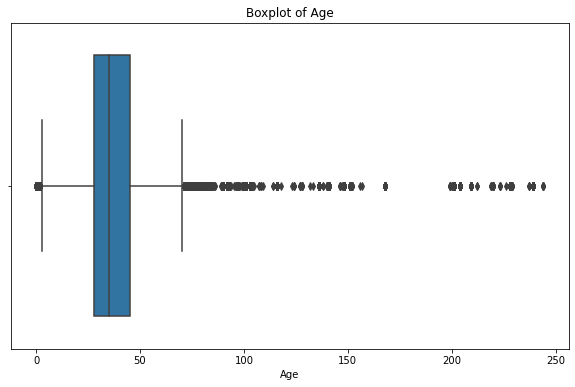

In [46]:
# Boxplot to visualize Age outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df1['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

#### Interpretation
The boxplot highlights a significant number of outliers indicating the need for data cleaning. Users with ages exceeding approximately 75 are flagged as potential outliers, suggesting there are abnormally high age values in the dataset. Values much higher than the median (around 29-33) extend far beyond the normal range of typical users. 

### c. Most Frequent Authors
This shows the most common authors in the dataset based on the number of books they have authored which might reflect author's popularity.

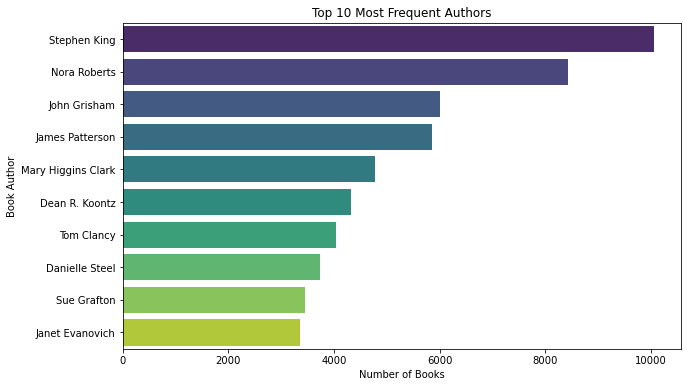

In [47]:
# Top 10 most frequent Authors
top_authors = merged_df1['Author'].value_counts().head(10)

# Plot for Top 10 Authors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title('Top 10 Most Frequent Authors')
plt.xlabel('Number of Books')
plt.ylabel('Book Author')
plt.show()

#### Interpretation
Based on the graph above, Stephen King is the most frequent author in the dataset, with over 10,000 books. The list continues with other well-known authors. It gives a clear visual of how much more frequent Stephen King's books are compared to the rest, showing him as a highly prolific author in this dataset.

### d. Most Frequent Publishers
This shows the publishers most frequent in the dataset which might reflect publisher popularity.

In [48]:
top_publishers = merged_df1['Publisher'].value_counts().head(10)
top_publishers

Ballantine Books            34724
Pocket                      31989
Berkley Publishing Group    28614
Warner Books                25506
Harlequin                   25027
Bantam Books                23598
Bantam                      20007
Signet Book                 19155
Avon                        17352
Penguin Books               17033
Name: Publisher, dtype: int64

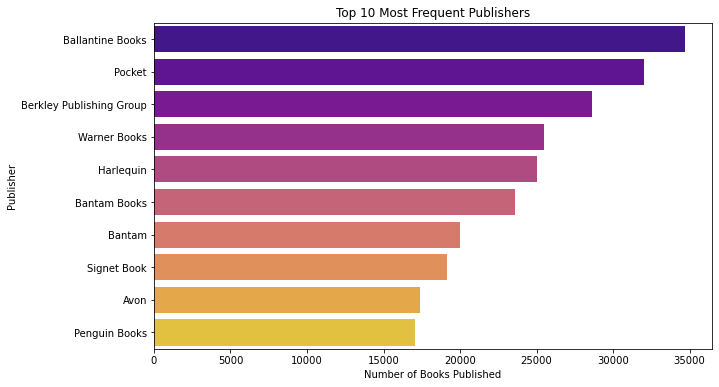

In [49]:
# Top 10 most frequent Publishers
top_publishers = merged_df1['Publisher'].value_counts().head(10)

# Plot for Top 10 Publishers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='plasma')
plt.title('Top 10 Most Frequent Publishers')
plt.xlabel('Number of Books Published')
plt.ylabel('Publisher')
plt.show()

#### Interpretation
Based on the graph above,Ballantine Books is the most frequent publisher, with over 34,000 books published, followed by Pocket. Other prominent publishers include Berkley Publishing Group, Warner Books, and Harlequin, with over 25,000 books each. Publishers like Signet Book, Avon, and Penguin Books complete the list, with Penguin Books publishing just over 17,000 books.

### 2. Bivariate Analysis

### a. Book Rating vs User age
We’ll explore the relationship between user age and the ratings they give to books.

In [50]:
# Group by 'Age' and calculate the average 'Book-Rating'
average_rating_by_age = merged_df1.groupby('Age')['Rating'].mean().reset_index()

# Rename the columns
average_rating_by_age.columns = ['Age', 'Average Book-Rating']
average_rating_by_age

,Age,Average Book-Rating
0,0.0,2.859180
1,1.0,3.464953
2,2.0,4.214953
3,3.0,4.923077
4,4.0,4.630996
...,...,...
136,228.0,0.492063
137,229.0,2.000000
138,237.0,3.333333
139,239.0,2.206897


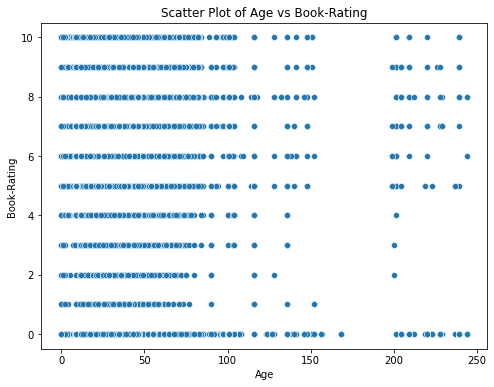

In [51]:
#Plot a Scatter plot of Book-Rating vs Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x=merged_df1['Age'], y=merged_df1['Rating'])
plt.title('Scatter Plot of Age vs Book-Rating')
plt.xlabel('Age')
plt.ylabel('Book-Rating')
plt.show()

#### Interpretation
The plot reveals the distribution of ratings based on user age. Users between 0 to about 90 years are densely distributed throughout the ratings. The presence of outliers may influence the observations made as the age is seen to range from 0 up to 244 years. Further analysis could include segmenting the age groups into specific ranges to assess these trends in more detail or exploring the specific genres or authors rated to understand what drives these differences in ratings.

#### Interpretation

### b. Book Author vs. Average Book Rating
This helps determine which authors tend to receive higher or lower average ratings.

In [52]:
avg_ratings_author = merged_df1.groupby('Author')['Rating'].mean().sort_values(ascending=False).reset_index()
avg_ratings_author.head(20)

,Author,Rating
0,Cev Abs,10.0
1,Mitchell Ivers,10.0
2,The Mayo Clinic,10.0
3,Moira Huntley,10.0
4,Moira Anderson Allen,10.0
5,Denis Tillinac,10.0
6,Elizabeth Appell,10.0
7,Samantha Hunter,10.0
8,Gail Pheterson,10.0
9,CHARLOTTE BRONTE,10.0


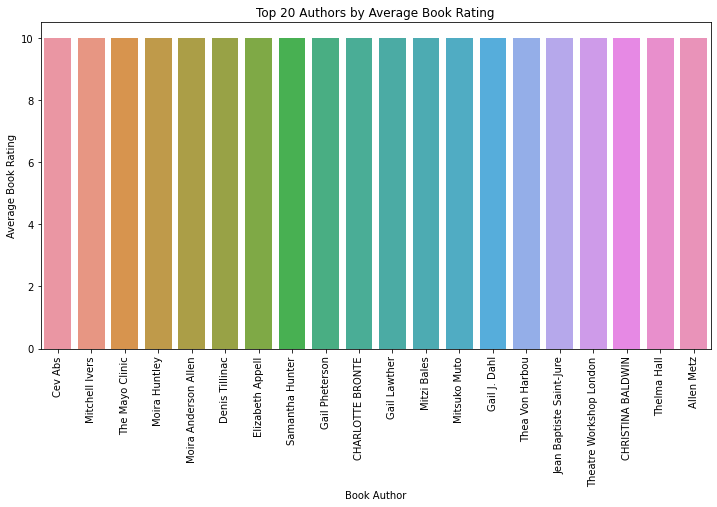

In [53]:
#Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Author', y='Rating', data=avg_ratings_author.head(20))#Get top 20 authors
plt.xticks(rotation=90)
plt.title('Top 20 Authors by Average Book Rating')
plt.xlabel('Book Author')
plt.ylabel('Average Book Rating')
plt.show()

#### Interpretation
All of the listed authors have a perfect rating of 10.0, indicating that their books have been highly rated by users.  Based on the plot we can assume that these authors are highly favored by their readers. The perfect ratings could be due to low rating count or a niche audience.
Books from these highly-rated authors could be prioritized in recommendation systems, especially for users who enjoy similar types of content or genres.

### c. Publisher vs. Average Book Rating
This examines whether certain publishers consistently publish books that receive higher ratings.

In [54]:
avg_ratings_publisher = merged_df1.groupby('Publisher')['Rating'].mean().sort_values(ascending=False).reset_index()
avg_ratings_publisher.head(20)

,Publisher,Rating
0,Editions P. Terrail,10.0
1,"Family CareWare, Inc.",10.0
2,Koehler &amp; Amelang Verlag MÃ?Â¼nchen Berlin,10.0
3,Koenisha Publications,10.0
4,Fandata Computer Services,10.0
5,Kristina DeVary,10.0
6,Crazy Pet Press,10.0
7,Stabur Pr,10.0
8,St.Martin's,10.0
9,KnÃ¶dler,10.0


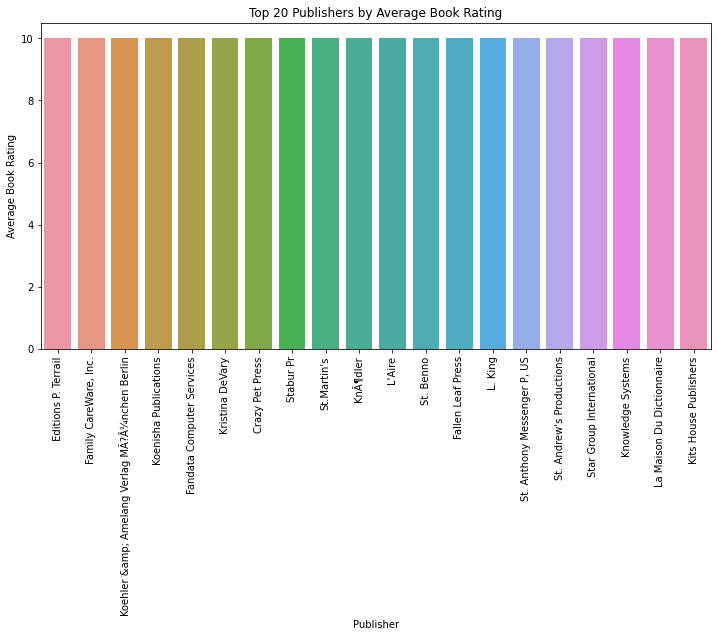

In [55]:
#Plot the graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Publisher', y='Rating', data=avg_ratings_publisher.head(20))
plt.xticks(rotation=90)
plt.title('Top 20 Publishers by Average Book Rating')
plt.xlabel('Publisher')
plt.ylabel('Average Book Rating')
plt.show()

#### Interpretation
The bar plot visually shows that all publishers in the top 20 have achieved a 10.0 average rating. The publishers could be from a diverse range of industries, from mainstream to niche publishing houses.In the analysis, books published by these top-rated publishers could be prominently featured in recommendation system for users who are likely to appreciate such content.Knowing which publishers consistently produce high-rated books allows for targeted advertising strategies, particularly for niche books that may attract specific types of readers. We might also conclude that publishers with few ratings may not be as influential.


### d. Age vs. Publisher Preference
This analysis helps to explore if users of certain age groups prefer books from specific publishers.

In [56]:
# Group by Publisher to get the average rating
avg_ratings_publisher = merged_df1.groupby('Publisher')['Rating'].mean().sort_values(ascending=False).reset_index()

# Select the top 20 publishers with the highest ratings
top_20_publishers = avg_ratings_publisher.head(20)

# Filter the merged_df1 dataset to only include the top 20 publishers
top_publishers_data = merged_df1[merged_df1['Publisher'].isin(top_20_publishers['Publisher'])]

# Group the data by Age and Publisher to calculate the average Book-Rating for each Age-Publisher combination
publisher_pref_by_age = top_publishers_data.groupby(['Age', 'Publisher'])['Rating'].mean().reset_index()
publisher_pref_by_age

,Age,Publisher,Rating
0,27.0,"Family CareWare, Inc.",10
1,28.0,Kristina DeVary,10
2,28.0,Stabur Pr,10
3,34.0,Fandata Computer Services,10
4,34.0,Koenisha Publications,10
5,37.0,Crazy Pet Press,10
6,39.0,St. Andrew's Productions,10
7,43.0,St.Martin's,10
8,46.0,"St. Anthony Messenger P, US",10
9,48.0,Fallen Leaf Press,10


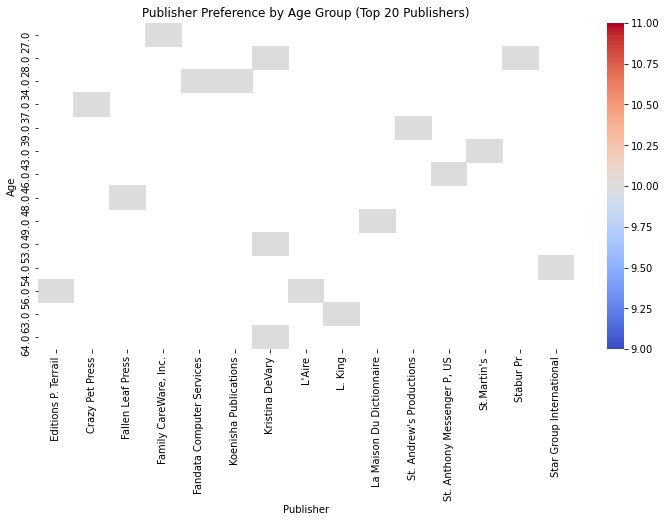

In [57]:
# Create the pivot table for the heatmap
pivot_table = publisher_pref_by_age.pivot(index='Age', columns='Publisher', values='Rating')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=False)
plt.title('Publisher Preference by Age Group (Top 20 Publishers)')
plt.xlabel('Publisher')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

#### Interpretation
The plot shows users ranging from 27 to 64 years. Some publishers may appeal more to younger readers, while others resonate with older audiences.Having a high concentration of ratings for certain publishers in specific age groups may indicate that those publishers focus on age-targeted content. All book ratings for the publishers listed in the heatmap are at the maximum value of 10. This indicates that the books published by these publishers are consistently rated highly across all age groups represented in the dataset. The consistent high ratings across various age groups suggest that the books from these publishers have a wide appeal and are well-received by readers of different ages. If some publishers have more ratings across different age groups, it can indicate they have a broader market reach or are more popular among various demographics.



### e. User vs. Book Rating
This helps to understand if certain users tend to give consistently higher while others may be more critical.


In [58]:
#Book rating by user
avg_ratings_user = merged_df1.groupby('UserID')['Rating'].mean().reset_index()

# Get the top 10 and bottom 10 users by average rating
top_10_users = avg_ratings_user.nlargest(10, 'Rating')
bottom_10_users = avg_ratings_user.nsmallest(10, 'Rating')
print(f"Top 10 users: {top_10_users}")
print(f"Bottom 10 users:{bottom_10_users}")

Top 10 users:      UserID  Rating
4        12    10.0
25       70    10.0
32       82    10.0
48      125    10.0
54      141    10.0
103     326    10.0
146     475    10.0
156     499    10.0
167     530    10.0
212     713    10.0
Bottom 10 users:    UserID  Rating
0        2     0.0
3       10     0.0
9       20     0.0
11      23     0.0
14      36     0.0
23      68     0.0
28      77     0.0
30      79     0.0
40      95     0.0
50     132     0.0


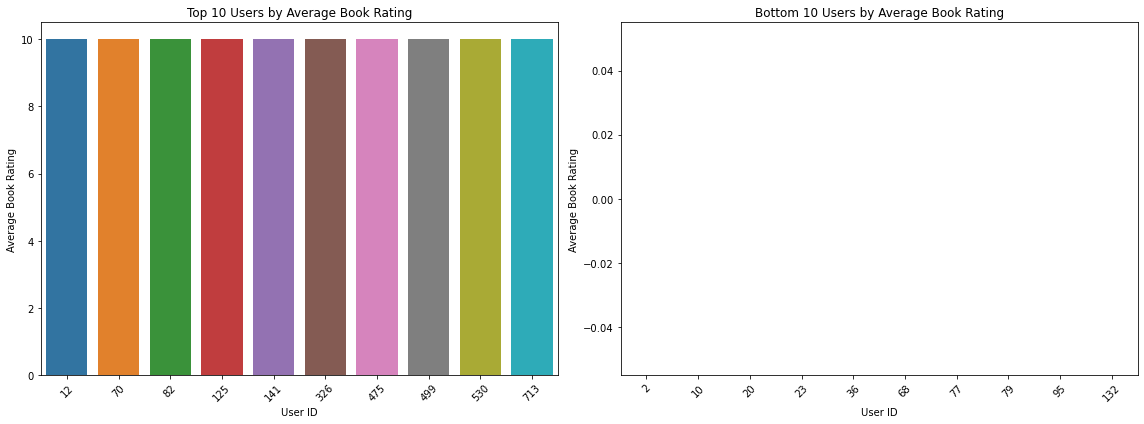

In [59]:
# Set up the figure and axes for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Top 10 Users
sns.barplot(x='UserID', y='Rating', data=top_10_users, ax=axes[0])
axes[0].set_title('Top 10 Users by Average Book Rating')
axes[0].set_xlabel('User ID')
axes[0].set_ylabel('Average Book Rating')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Bottom 10 Users
sns.barplot(x='UserID', y='Rating', data=bottom_10_users, ax=axes[1])
axes[1].set_title('Bottom 10 Users by Average Book Rating')
axes[1].set_xlabel('User ID')
axes[1].set_ylabel('Average Book Rating')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

#### Interpretation
The top 10 users have an average book rating of 10.0 indicating that these users have only given perfect ratings to the books they have rated. Since all top users show the same maximum rating, it suggests that these users might have either a very favorable view of the books they rated, or they may have rated only a few select books that they felt deserved a perfect score which could point to a potential bias in their rating behavior.

The bottom 10 users have an average book rating of 0.0. This indicates that these users have not given any ratings above zero, implying they may not have engaged with the books in a way that they felt warranted a rating.
These users might not have found any books satisfactory enough to rate positively, suggesting dissatisfaction with the content or quality of books available to them. It's also possible that these users are not active readers or have not rated enough books to form a comprehensive view. This lack of ratings might negatively affect the overall average ratings for books in the system if these users account for a substantial number of ratings. 

The contrast between the top and bottom users highlights the variability in user engagement and satisfaction within the dataset. It suggests two extremes: highly engaged users with consistently positive feedback and users who do not engage meaningfully with the reading material.


### f. Year of Publication vs. Average Book Rating
This helps to investigate whether older books or more recent publications tend to receive higher ratings.


In [60]:
avg_ratings_year = merged_df1.groupby('Publication_Year')['Rating'].mean().reset_index()
avg_ratings_year

,Publication_Year,Rating
0,0,3.132415
1,1376,4.000000
2,1378,10.000000
3,1806,5.000000
4,1897,0.000000
...,...,...
113,2037,10.000000
114,2038,2.375000
115,2050,4.857143
116,DK Publishing Inc,2.333333


In [61]:
# Get the 75th percentile rating
top_ratings_threshold = avg_ratings_year['Rating'].quantile(0.75)  
top_ratings_year = avg_ratings_year[avg_ratings_year['Rating'] >= top_ratings_threshold]#to get years with top ratings
top_ratings_year

,Publication_Year,Rating
1,1376,4.000000
2,1378,10.000000
3,1806,5.000000
6,1901,4.571429
8,1904,10.000000
9,1906,5.000000
10,1908,10.000000
22,1925,3.600000
26,1929,4.041667
27,1930,3.955224


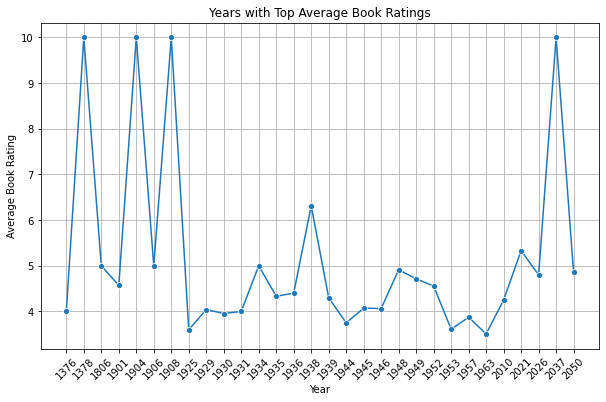

In [62]:
# Plot the graph for top ratings
plt.figure(figsize=(10, 6))
sns.lineplot(x='Publication_Year', y='Rating', data=top_ratings_year, marker='o')  # Adding markers for clarity
plt.title('Years with Top Average Book Ratings')
plt.xlabel('Year')
plt.ylabel('Average Book Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Optional: add a grid for better visual clarity
plt.show()

#### Interpretation
The ratings across different years show variability, indicating that some years produced books with significantly higher average ratings than others. By examining the overall trend across the years, you might observe if there are patterns in book quality over time. For instance, ratings seem relatively stable with some peaks, but there is also a drop in ratings in certain periods. This could suggest fluctuations in publishing quality, reader preferences, or the impact of historical events on literature.
The average ratings for more recent years indicates a potential resurgence in quality, or perhaps the influence of modern publishing trends and accessibility through various platforms.
Based on the graph we can see presence of outliers, particularly in  future years from 2026-2050 that will need to be removed.

### Data Cleaning
For this section we will clean the dataset of any duplicates, missing values and outliers.

#### i. Duplicates


In [63]:
#Checking for duplicates
merged_df1.duplicated().any()

False

In [64]:
print("""From the above, we can conclude that our dataset has no duplicated values""")

From the above, we can conclude that our dataset has no duplicated values


### ii. Outliers
There are some outliers in the 'Age' column that may affect our analysis and thus best to be removed.

In [65]:
#Capping the age column to a reasonable range of 5 < x <100
merged_df1['Age'] = merged_df1['Age'].apply(lambda x: 5 if x < 5 else (100 if x > 100 else x))

The 'Year-Of-Publication' column also had some outliers years exceeding the normal range that need to be removed. We will also convert the column into the right data type which is an interger column.

In [66]:
#Filter out non-integer values in the Year-Of-Publication column
merged_df1 = merged_df1[pd.to_numeric(merged_df1['Publication_Year'], errors='coerce').notnull()]

#Convert the Year-Of-Publication column to integers
merged_df1['Publication_Year'] = merged_df1['Publication_Year'].astype('int64')

#Remove rows where Year-Of-Publication is 2023 or later
merged_df1 = merged_df1[merged_df1['Publication_Year'] < 2024]

In [67]:
#Assert that all values in 'Year-Of-Publication' are integers
assert merged_df1['Publication_Year'].dtype == 'int64', "Year-Of-Publication is not of type int"

#Assert that all values are less than 2024
assert (merged_df1['Publication_Year'] < 2024).all(), "There are values in Year-Of-Publication that are not less than 2023"

#Assert that there are no missing values
assert merged_df1['Publication_Year'].notnull().all(), "There are missing values in Year-Of-Publication"

#### iii. Missing values

In [68]:
# Check for missing values
merged_df1.isnull().sum()

UserID                   0
Rating                   0
Age                 277815
ISBN                     0
Book_title               0
Author                   1
Publication_Year         0
Publisher                2
dtype: int64

In [69]:
#Percentage of missing values
merged_df1.isnull().mean()*100

UserID               0.000000
Rating               0.000000
Age                 26.944130
ISBN                 0.000000
Book_title           0.000000
Author               0.000097
Publication_Year     0.000000
Publisher            0.000194
dtype: float64

#### Dropping rows
For columns like 'Book-Author' and 'Publisher' with very few missing values, it's best to drop the rows with the null values.

In [70]:
# Drop rows with missing values in the two columns
merged_df1 = merged_df1.dropna(subset=['Author', 'Publisher'])
#Checking for remaining missing values
merged_df1.isnull().mean()*100

UserID               0.000000
Rating               0.000000
Age                 26.944209
ISBN                 0.000000
Book_title           0.000000
Author               0.000000
Publication_Year     0.000000
Publisher            0.000000
dtype: float64

#### Replacing missing values
From the above, we can observe that the 'Age' column has a large number of null values as it has approximately 27% missing data. As this column is crucial, dropping it might affect our analysis thus we replace the missing values with the median using SimpleImputer.

In [71]:
#import necessary libraries
from sklearn.impute import SimpleImputer

# Assuming df_users is the dataframe containing user data
imputer = SimpleImputer(strategy='median')
merged_df1['Age'] = imputer.fit_transform(merged_df1[['Age']])

In [72]:
#Checking for any remaining missing values
merged_df1.isnull().sum()

UserID              0
Rating              0
Age                 0
ISBN                0
Book_title          0
Author              0
Publication_Year    0
Publisher           0
dtype: int64

### Feature Engineering
From our dataset, a new column with age groups is created for better understanding of book preference based on certain age groups.

In [73]:
#Define function for feature engineering
def age_group(age):
    if age < 18:
        return 'Child'
    elif age < 35:
        return 'Young Adult'
    elif age < 55:
        return 'Adult'
    else:
        return 'Senior'

# Apply the age_group function only on known ages
merged_df1['Age_Group'] = merged_df1['Age'].apply(lambda x: age_group(x) if pd.notnull(x) else np.nan)
merged_df1.head()

,UserID,Rating,Age,ISBN,Book_title,Author,Publication_Year,Publisher,Age_Group
0,276725,0,35.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Adult
1,2313,5,23.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Young Adult
2,6543,0,34.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Young Adult
3,8680,5,5.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Child
4,10314,9,35.0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Adult


In [74]:
#Count of each age group
merged_df1['Age_Group'].value_counts()

Adult          595053
Young Adult    341169
Senior          72530
Child           22323
Name: Age_Group, dtype: int64

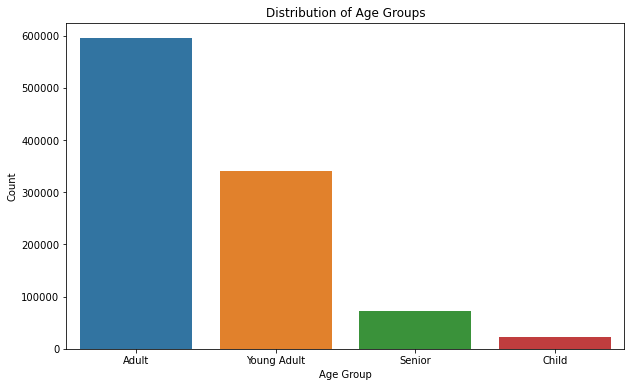

In [75]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a count plot for Age Groups
sns.countplot(x='Age_Group', data=merged_df1, order=merged_df1['Age_Group'].value_counts().index)

# Set the title and labels
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Display the plot
plt.show()

#### Interpretation
Based on the plot, the adult category significantly outnumbers the other age groups with a count of over 500,000, indicating that the dataset primarily consists of adult users. Young Adult group has a substantial representation but is almost half the size of the adult group. The smaller representation is of the Seniors and Children. The child group with less than 30,00 users, in particular, is quite small compared to the others.These findings may suggest that marketing strategies should primarily focus on adults and young adults, as they represent the majority of your user base.

## MODELLING
In our analysis we will use collaborative based filtering to build our recommendation system. 

### Collaborative Filtering
We can use matrix factorization, such as Singular Value Decomposition (SVD), for collaborative filtering.

#### Train/Test Split for evaluation

In [113]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Prepare data for Surprise
reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(merged_df1[['UserID', 'ISBN', 'Rating']], reader)

#### Hyperparameter Tuning
We will use GridSearchCV from the surprise library to optimize hyperparameters.

In [117]:
#Import necessary libraries:Takes about 10 minutes to run
from surprise.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_factors': [30, 50],
    'reg_pu': [0.1, 0.2],
    'reg_qi': [0.1, 0.2]
}

# Perform GridSearchCV
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=2)
grid_search.fit(data)

# Get the best parameters
best_params = grid_search.best_params['rmse']
print("Best Parameters: ", best_params)

Best Parameters:  {'n_factors': 50, 'reg_pu': 0.2, 'reg_qi': 0.2}


#### Model Training with tuned parameters
On our analysis we use Singular Value Decomposition for collaborative filtering. It factorizes the user-item interaction matrix into lower-dimensional matrices which helps in capturing latent features that explain the user-book relationship.


In [178]:
# Model Training: Using SVD for collaborative filtering
from surprise.model_selection import GridSearchCV
from surprise import accuracy

#Set best parameters
best_model = SVD(n_factors=best_params['n_factors'], 
                  reg_pu=best_params['reg_pu'], 
                  reg_qi=best_params['reg_qi'])

# Fit the model
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
best_model.fit(trainset)

# Evaluate on the test set
predictions = best_model.test(testset)

# Extract true and predicted ratings
true_ratings = [pred.r_ui for pred in predictions]  # Actual ratings
predicted_ratings = [pred.est for pred in predictions]  # Predicted ratings

# Evaluate model performance on the test set
accuracy.rmse(predictions)  # Root Mean Square Error
accuracy.mae(predictions)   # Mean Absolute Error

RMSE: 3.4219
MAE:  2.7470


2.7470455611987856

In [213]:
print("""Based on the above, an RMSE of 3.4219 suggests that on average, 
the predicted ratings deviate from the true ratings by approximately 3.42 units.

An MAE of 2.7470 indicates that on average, 
the predicted ratings differ from the true ratings by about 2.75 units.

A lower RMSE and MAE indicates better performance.""")

Based on the above, an RMSE of 3.4219 suggests that on average, 
the predicted ratings deviate from the true ratings by approximately 3.42 units.

An MAE of 2.7470 indicates that on average, 
the predicted ratings differ from the true ratings by about 2.75 units.

A lower RMSE and MAE indicates better performance.


## Model Evaluation
For this model's evaluation we will use the accuracy metrics mainly foucusing on **precision score**.

In [244]:
#Convert Ratings to Binary (1 if relevant, 0 if not)
# Define the threshold for relevance
threshold = 7

binary_true = [1 if rating >= threshold else 0 for rating in true_ratings]
binary_predicted = [1 if rating >= threshold else 0 for rating in predicted_ratings]

### Class Imbalance

In [247]:
#Check the distribution of classes
class_distribution = pd.Series(binary_true).value_counts()

# Display the distribution
print("Class Distribution:")
print(class_distribution)

Class Distribution:
0    148242
1     57973
dtype: int64


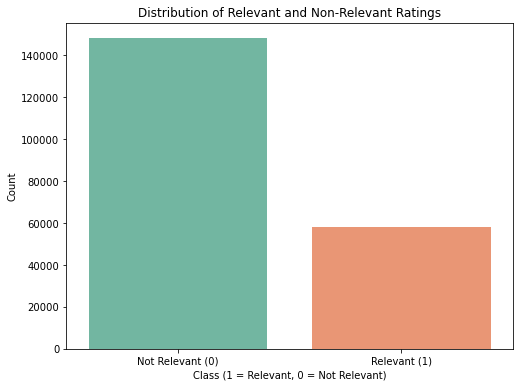

In [250]:
#Check distribution of classes for class imbalance

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x=binary_true, palette='Set2')

# Labeling the plot
plt.xlabel('Class (1 = Relevant, 0 = Not Relevant)')
plt.ylabel('Count')
plt.title('Distribution of Relevant and Non-Relevant Ratings')
plt.xticks(ticks=[0, 1], labels=['Not Relevant (0)', 'Relevant (1)'])
plt.show()

#### Handling class imbalance
There is a class imbalance as 'Non Relevant' class has a larger count compared to 'Relevant' class. 
We handle the class imbalance by applying Random under sampling where we reduce the the majority class thus balancing the dataset to avoid tampering with integrity of the data.

In [248]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the under-sampler
under_sampler = RandomUnderSampler(random_state=42)

# Create a DataFrame from binary ratings for resampling
data = pd.DataFrame({'True': binary_true, 'Predicted': binary_predicted})

# Apply under-sampling
X_under, y_under = under_sampler.fit_resample(data[['Predicted']], data['True'])

# Check new class distribution
new_class_distribution = pd.Series(y_under).value_counts()
print("New Class Distribution after Under-Sampling:")
print(new_class_distribution)

New Class Distribution after Under-Sampling:
1    57973
0    57973
Name: True, dtype: int64


#### Evaluation Metrics
We then apply the evaluatio metrics to evaluate the performance of our model.

In [251]:
#import library
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

#Calculate Precision, Recall, and F1-Score
precision = precision_score(binary_true, binary_predicted)
recall = recall_score(binary_true, binary_predicted)
f1 = f1_score(binary_true, binary_predicted)
accuracy = accuracy_score(binary_true, binary_predicted)

# Print the evaluation metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.7977
Recall: 0.0817
F1-Score: 0.1483
Accuracy: 0.7360


#### Interpretation
Precision of 80% measures the proportion of relevant recommendations that were actually correct i.e how many of the recommended books were truly relevant. It means that about 79.77% of the books recommended by your model were relevant (rated above the threshold of 7). This indicates that when our model recommends a book, there is a high chance that the recommendation is indeed a good fit for the user.

A recall score of 0.0817  suggests that your model only identified 8.20% of all the relevant books that were actually present meaning many relevant books are being missed.

An F1-score of 0.1483 suggests that while the model is good at recommending relevant items, it fails to recommend most of the relevant items available.

An accuracy score of 0.7360 indicates that the model is correct about 73.60% of the time. 

In [214]:
print("""Based on the results above,
our model meets our goal of having a precision score above 75% as it had a score of  0.7977
showing that about 79.77% of the books recommended by your model were relevant.""")

Based on the results above,
our model meets our goal of having a precision score above 75% as it had a score of  0.7977
showing that about 79.77% of the books recommended by your model were relevant.


#### Calculating Cosine Similarity
We will use cosine similarity on the item-user matrix to find similar books based on ratings.

In [221]:
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

# Keep only the top N users and items
top_n_users = merged_df1['UserID'].value_counts().head(1000).index
top_n_items = merged_df1['ISBN'].value_counts().head(1000).index

# Filter the original DataFrame
filtered_df = merged_df1[merged_df1['UserID'].isin(top_n_users) & merged_df1['ISBN'].isin(top_n_items)]

# Create the user-item rating matrix
user_item_matrix = filtered_df.pivot_table(index='UserID', columns='ISBN', values='Rating', aggfunc='mean').fillna(0)

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(user_item_matrix)

# Create a DataFrame for easier access
cosine_sim_df = pd.DataFrame(cosine_sim, index=user_item_matrix.index, columns=user_item_matrix.index)
cosine_sim_df.head()

UserID,254,2033,2276,2766,2977,3363,4017,4385,6251,6323,...,274301,274308,274808,275970,276680,277427,277478,277639,278188,278418
UserID,,,,,,,,,,,,,,,,,,,,,
254,1.000000,0.443719,0.0,0.0,0.11001,0.0,0.000000,0.000000,0.161128,0.000000,...,0.000000,0.063228,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
2033,0.443719,1.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.231756,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
2276,0.000000,0.000000,1.0,0.0,0.00000,0.0,0.000000,0.282279,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
2766,0.000000,0.000000,0.0,1.0,0.00000,0.0,0.131868,0.000000,0.000000,0.116016,...,0.074241,0.000000,0.0,0.051864,0.124228,0.0,0.221028,0.0,0.0,0.056033
2977,0.110010,0.000000,0.0,0.0,1.00000,0.0,0.049850,0.000000,0.076989,0.000000,...,0.077745,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000


### Recommendation Quality Assessment

### i) User-User Collaborative Filtering
This emphasizes on user-user collaborative filtering, leveraging similarities in user behavior.

In [254]:
def get_similar_users(user_id, n=5):
    # Get similar users based on cosine similarity
    similar_user_ids = cosine_sim_df[user_id].sort_values(ascending=False)[1:n+1].index
    
    # Prepare a list to hold the results
    results = []

    # Iterate through each similar user
    for sim_user_id in similar_user_ids:
        # Get the books rated by the similar user
        user_books = merged_df1[merged_df1['UserID'] == sim_user_id]
        
        # Add the book ratings and titles to the results
        for _, row in user_books.iterrows():
            results.append({
                'UserID': sim_user_id,
                'Rating': row['Rating'],
                'Book_title': row['Book_title'],
                'Author':row['Author'],
                'Age_Group':row['Age_Group']# Replace with the correct column name for book title
            })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df


In [280]:
#Recommend 5 books for user with User-ID
user_id=11676
books_recommended = get_similar_users(user_id, n=5)
books_recommended.head()

,UserID,Rating,Book_title,Author,Age_Group
0,16795,8,Lightning,Dean R. Koontz,Adult
1,16795,7,Manhattan Hunt Club,JOHN SAUL,Adult
2,16795,0,Night Sins,TAMI HOAG,Adult
3,16795,0,Make Them Cry,Kevin O'Brien,Adult
4,16795,0,The Pillars of the Earth,Ken Follett,Adult


In [281]:
user_id=merged_df1['UserID'][50]
books_recommended = get_similar_users(user_id, n=5)
books_recommended.head()

,UserID,Rating,Book_title,Author,Age_Group
0,175003,0,Night Sins,TAMI HOAG,Young Adult
1,175003,0,Make Them Cry,Kevin O'Brien,Young Adult
2,175003,10,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,Young Adult
3,175003,0,Move to Strike,Perri O'Shaughnessy,Young Adult
4,175003,0,The Second Summer of the Sisterhood,ANN BRASHARES,Young Adult


#### Interpretation
The output of the function lists the books rated by the similar users along with their ratings highlighting the books that these similar users found appealing. 
The inclusion of books with varying ratings  indicates that the function captures a range of preferences. This approach does not seem to depend on rating as the books all vary in ratings with some having high ratings while others have zero.

Overall conclusion is that, the user-user collaborative filtering approach effectively identifies relevant books based on the behavior of similar users.

### Item-based collaborative filtering
**Building a recommendation function based on Item rating**

This method is based on a predictive model (SVD) that estimates ratings for unseen books concentrating on providing personalized recommendations based on predicted ratings for specific books.

In [256]:
# Function to recommend books based on collaborative filtering
def recommend_books(user_id, best_model, merged_df, num_recommendations=5):
    """
    Recommends books for a given user based on collaborative filtering using the trained SVD model.
    Returns:
     A DataFrame with the top N book recommendations for the user
    """
    # Get all book ISBNs
    all_books = merged_df['ISBN'].unique()

    # Get books already rated by the user
    rated_books = merged_df[merged_df['UserID'] == user_id]['ISBN'].unique()

    # Find books that the user hasn't rated yet
    unrated_books = [isbn for isbn in all_books if isbn not in rated_books]

    # Predict ratings for all unrated books
    predictions = []
    for isbn in unrated_books:
        pred = best_model.predict(user_id, isbn)
        predictions.append((isbn, round(pred.est)))  # ISBN and predicted rating

    # Sort by predicted rating in descending order and select the top recommendations
    recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)[:num_recommendations]

    # Create a DataFrame with recommended books and their predicted ratings
    recommendations_df = pd.DataFrame(recommendations, columns=['ISBN', 'Predicted Rating'])

    # Merge with the original dataset to get additional book details (Book title, Author, etc.)
    recommendations_df = recommendations_df.merge(
        merged_df[['ISBN', 'Book_title', 'Author', 'Publisher']].drop_duplicates(), 
        on='ISBN', 
        how='left'
    )
   # Calculate the average age for each book based on users who rated it
    age_group_df = merged_df.groupby('ISBN')['Age_Group'].agg(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()
    
    # Merge average age group back into recommendations DataFrame
    recommendations_df = recommendations_df.merge(age_group_df, on='ISBN', how='left', suffixes=('', '_Avg'))

    # Rename the average age group column for clarity
    recommendations_df.rename(columns={'Age_Group_Avg': 'Average_Age_Group'}, inplace=True)

    return recommendations_df


In [257]:
#Recommend 5 books for user with User-ID '11676'
user_id = 11676
recommended_books = recommend_books(user_id, best_model, merged_df1, num_recommendations=5)
recommended_books

,ISBN,Predicted Rating,Book_title,Author,Publisher,Age_Group
0,0446677450,10.0,"Rich Dad, Poor Dad: What the Rich Teach Their ...",Robert T. Kiyosaki,Warner Books,Adult
1,0061020710,10.0,The Color of Magic,Terry Pratchett,HarperTorch,Young Adult
2,0671025368,9.0,The Coldest Winter Ever,Sister Souljah,Pocket,Adult
3,0811802981,9.0,The Golden Mean: In Which the Extraordinary Co...,Nick Bantock,Chronicle Books,Adult
4,0670241334,9.0,Corduroy,Don Freeman,Viking Juvenile,Adult


In [282]:
user_id = user_id = merged_df1['UserID'][50]
recommended_books = recommend_books(user_id, best_model, merged_df1, num_recommendations=5)
recommended_books

,ISBN,Predicted Rating,Book_title,Author,Publisher,Age_Group
0,0439064864,10.0,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,Scholastic,Young Adult
1,0380813815,9.0,"Lamb : The Gospel According to Biff, Christ's ...",Christopher Moore,Perennial,Adult
2,0553375407,9.0,Ishmael: An Adventure of the Mind and Spirit,Daniel Quinn,Bantam,Adult
3,0440498058,8.0,A Wrinkle In Time,MADELEINE L'ENGLE,Yearling,Adult
4,0385486804,8.0,Into the Wild,Jon Krakauer,Anchor,Adult


#### Interpretation
For both examples, the recommendations shows high predicted ratings, with some of the books receiving a perfect score of 10.0 while others are rated 8.0 and 9.0. This indicates a strong expectation that the user will enjoy these titles based on the preferences of similar users.

The recommended books caters to different interests with majority in the "Adult" age group and a few in the 'Young Adult' age group which could translate to the users in the examples likely being in the Adult age group.

The successful generation of relevant recommendations indicates that the SVD model effectively captures the nuances of user preferences and behaviors. 

## CONCLUSION

Based on our analysis we came to the following conclusions:

**1. Effectiveness of Collaborative Filtering**: The analysis demonstrated that collaborative filtering using Singular Value Decomposition (SVD) can effectively predict book ratings for users based on their historical preferences and those of similar users. The model achieved a precision score of 0.7977, indicating a high percentage of relevant recommendations. This suggests that users are likely to find the recommended books appealing.

**2. Model Performance Evaluation**: The RMSE of 3.4219 and MAE of 2.7470 indicate that the model has a reasonable predictive accuracy, with the errors being manageable for the recommendation context. However, the low recall score of 0.0817 indicates that many relevant books are not being captured by the model, which may require further attention to enhance the recommendation quality.

**3. User and Item-Based Collaborative Filtering**: The user-user method effectively identified similar users and their preferences as majority lie it the same age group, while the item-based approach using SVD provided personalized recommendations based on predicted ratings for unseen books. 
Based on our analysis, the same user has different recommendations based on the two different approaches. This shows that different factors are considered for each approach in recommending.

**4. Based on the item-based approach**, highly rated books are preferred by most users.

## RECOMMENDATIONS

1. Enhance Personalization and Feedback Mechanisms:Implementation of user profiles and feedback options like encourage users to rate books to gather preferences,thus improving the accuracy of book recommendations. 

2. Utilize Data for Targeted Marketing: Leveraging insights from the recommendation system, focusing on a certain age group can be quite beneficial as majority are drawn to the same type of books. 

3. The business should also focus on promoting books highly rated by similar users te ensure a high user engagement and providing discounts based on individual reading preferences can also promote customer satisfaction thus boosting revenue.

## FURTHER STUDIES

Based on our analysis there are areas that may need further analysis.

**1. Explore Alternative Algorithms**: Investigate the performance of other recommendation algorithms, such as neural collaborative filtering or hybrid approaches, to compare their effectiveness against the current SVD model.

**2. Content-Based Recommendations**: Explore the potential for a content-based recommendation system that utilizes book attributes, such as author, to complement collaborative filtering methods and provide more holistic recommendations.
